In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(2430981, 25)

In [4]:
train['click'].sum()

1793

In [5]:
# Relative:
train['click'].sum() / train.shape[0]

0.0007375623256619447

In [2]:
val = pd.read_csv('validation.csv')

In [13]:
val['click'].sum() / val.shape[0]

0.0006646376573167722

In [8]:
train.count()/6250

click             388.95696
weekday           388.95696
hour              388.95696
bidid             388.95696
userid            388.95696
useragent         388.95696
IP                388.95696
region            388.95696
city              388.95696
adexchange        380.98432
domain            367.01536
url               375.06704
urlid               0.00000
slotid            388.95696
slotwidth         388.95696
slotheight        388.95696
slotvisibility    388.95696
slotformat        388.95696
slotprice         388.95696
creative          388.95696
bidprice          388.95696
payprice          388.95696
keypage           308.15856
advertiser        388.95696
usertag           309.36032
dtype: float64

In [9]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


### So the chosen approach is to bid by row order and not necessarily bid for all auctions

In [8]:
df_sub = train[['click','payprice']].copy()
start = time.time()
clicks = []
budget = 6250 * 1000
for bid in range(2,301):

    df = df_sub[df_sub['payprice'] < bid]
    cost = df['payprice'].cumsum()
    eligible = df[cost < budget]
    
    clicksum, costsum = eligible.sum()
    wins = len(eligible)
    
    clicks.append([bid, clicksum, wins, costsum])

print(time.time()-start)    
#clicks    

30.24058747291565


In [9]:
res = pd.DataFrame(clicks, columns=['bid', 'clicks', 'wins', 'cost'])
res.head(10)

,bid,clicks,wins,cost
0,2,0,2809,2322
1,3,0,6228,9160
2,4,0,6987,11437
3,5,2,17382,53017
4,6,4,62513,278672
5,7,32,77072,366026
6,8,33,89241,451209
7,9,33,99184,530753
8,10,34,109676,625181
9,11,40,130911,837531


In [10]:
res.sort_values(by='clicks', ascending=False)

,bid,clicks,wins,cost
23,25,134,411910,6249991
24,26,134,404647,6249984
22,24,132,419299,6249994
25,27,131,400256,6249994
34,36,131,324874,6249997
29,31,130,367893,6249989
37,39,130,309313,6249974
36,38,130,314802,6249997
35,37,130,318806,6249998
21,23,129,425274,6249992


In [11]:
### Validation
df_sub = val[['click','payprice']].copy()
start = time.time()
clicks = []
budget = 6250 * 1000
for bid in [25, 26]: #range(2,301):
    #bid = 22
    df = df_sub[df_sub['payprice'] < bid]
    
    cost = df['payprice'].cumsum()
    #print(eligible)
    eligible = df[cost < budget]
    #print(eligible)
    
    clicksum, costsum = eligible.sum()
    wins = len(eligible)
    
    clicks.append([bid, clicksum, wins, costsum])

print(time.time()-start)    
res = pd.DataFrame(clicks, columns=['bid', 'clicks', 'wins', 'cost'])
res.sort_values(by='clicks', ascending=False)
#clicks    

0.03490400314331055


,bid,clicks,wins,cost
1,26,16,60444,934656
0,25,15,58778,893006


#### Results:
- Bidding 25 and 26 are equally good in training, each scoring 134 clicks.
- Validation: Bidding 26 is better with 16 clicks versus 15 clicks from bidding 25.

### Range bidding

In [100]:
### 
df_sub = train[['click','payprice']].copy()
nrand = len(df_sub)
start = time.time()
clicks = []
budget = 6250 * 1000
for lbound in range(2,301):
    for ubound in range(lbound+1,301):
        
        bid = np.round(np.random.uniform(lbound, ubound, nrand))
        df = df_sub[df_sub['payprice'] < bid]
        cost = df['payprice'].cumsum()
        eligible = df[cost < budget]
        clicksum, costsum = eligible.sum()
    
        clicks.append([lbound, ubound, clicksum, costsum])

print(time.time()-start)    

# 5875.272375822067

5875.272375822067


In [102]:
res = pd.DataFrame(clicks, columns=['lbound', 'ubound', 'clicks', 'cost'])
#res.to_csv('bounded_combinations.csv')
res.sort_values(by='clicks', ascending=False)[:20]

,lbound,ubound,clicks,cost
2384,10,39,154,6249999
3818,15,38,147,6249990
2101,9,46,147,6249980
2670,11,36,146,5926676
3247,13,38,144,6249987
633,4,43,143,6249995
4101,16,37,142,6249998
639,4,49,142,6249976
3834,15,54,142,6249972
1513,7,41,142,6249980


In [105]:
# Subset clicks >= 100
res_top = res[res['clicks'] >= 100]
print(len(res_top))
res_top.head()

1349


,lbound,ubound,clicks,cost
33,2,36,101,4448619
34,2,37,108,4674234
35,2,38,115,4893141
36,2,39,108,5146249
37,2,40,123,5367198


In [116]:

df_sub = train[['click','payprice']].copy()
nrand = len(df_sub)
nsims = 10
start = time.time()
clicks = []
budget = 6250 * 1000
for _, row in res_top[['lbound', 'ubound']].iterrows():
    tmp_sum = 0
    
    for i in range(nsims):
        
        bid = np.random.randint(row.values[0], row.values[1]+1, nrand)
        df = df_sub[df_sub['payprice'] < bid]
        cost = df['payprice'].cumsum()
        eligible = df[cost <= budget]
        clicksum = eligible['click'].sum()

        tmp_sum += clicksum

    clicks.append(tmp_sum/nsims)
    
print(time.time()-start)    


# 988.7150204181671

988.7150204181671


In [119]:
res_top.head()

,lbound,ubound,clicks,cost,sim_mean
33,2,36,101,4448619,101.0
34,2,37,108,4674234,106.4
35,2,38,115,4893141,108.8
36,2,39,108,5146249,111.2
37,2,40,123,5367198,111.7


In [122]:
res_top.sort_values(by='sim_mean', ascending=False).head(20)

,lbound,ubound,clicks,cost,sim_mean
3817,15,37,138,6249990,138.2
4382,17,35,130,6249993,137.9
4663,18,34,137,6249977,136.7
2094,9,39,134,6249983,136.6
2961,12,39,132,6249982,136.3
4379,17,32,135,6249987,136.0
5223,20,33,131,6249989,135.9
3533,14,38,127,6249988,135.9
3819,15,39,141,6249988,135.9
6052,23,28,133,6249999,135.2


In [95]:
### 
df_sub = train[['click','payprice']].copy()
nrand = len(df_sub)
start = time.time()
most_clicks = 0
budget = 6250 * 1000
for lbound in range(2,301):
    for ubound in range(lbound+1,301):
        
        bid = np.random.randint(lbound, ubound+1, nrand)
        df = df_sub[df_sub['payprice'] < bid]
        cost = df['payprice'].cumsum()
        eligible = df[cost <= budget]
        
        clicksum = eligible['click'].sum()
        
        if clicksum > most_clicks:
            most_clicks = clicksum
            best_bounds = [lbound, ubound]
            best_cost = eligible['payprice'].sum()

print(time.time()-start)
print(most_clicks, best_bounds, best_cost)

#5068.889694213867
#150 [13, 37] 6249994

5068.889694213867
150 [13, 37] 6249994


### Load from file and run simulations

In [107]:
res_f = pd.read_csv('bounded_combinations.csv')

In [108]:
res_top_f = res_f[res_f['clicks'] >= 100]
res_top_f.reset_index(drop=True, inplace=True)
res_top_f.drop(columns=['idx'], inplace=True)
print(len(res_top_f))
res_top_f.head()



1349


,lbound,ubound,clicks,cost
0,2,36,101,4448619
1,2,37,108,4674234
2,2,38,115,4893141
3,2,39,108,5146249
4,2,40,123,5367198


In [110]:
np.random.seed(0)
df_sub = train[['click','payprice']].copy()
nrand = len(df_sub)
nsims = 50
start = time.time()
clicks = []
wins = []
costs = []
budget = 6250 * 1000
#for bid in [25, 26]: #range(2,301):
for _, row in res_top_f[['lbound', 'ubound']].iterrows():
    tmp_clicks = 0
    tmp_wins = 0
    tmp_cost = 0
    
    for i in range(nsims):
        
        bid = np.random.randint(row.values[0], row.values[1]+1, nrand)
        df = df_sub[df_sub['payprice'] < bid]
        cost = df['payprice'].cumsum()
        eligible = df[cost <= budget]
        clicksum, costsum = eligible.sum()
        winsum = len(eligible)

        tmp_clicks += clicksum
        tmp_wins += winsum
        tmp_cost += costsum/nsims

    clicks.append(tmp_clicks/nsims)
    wins.append(tmp_wins/nsims)
    costs.append(tmp_cost)
    
print(time.time()-start)    



5511.872428655624


In [111]:
res_top_f['sim_clicks_mean'] = clicks
res_top_f['sim_wins_mean'] = wins
res_top_f['sim_cost_mean'] = costs
res_top_f.sort_values(by='sim_clicks_mean', ascending=False).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean
413,13,39,135,6249993,136.08,387534.10,6249990.02
690,20,32,137,6249978,135.70,403914.94,6249989.72
567,17,35,130,6249993,135.48,397767.74,6249992.10
371,12,39,132,6249982,135.12,390248.56,6249989.82
410,13,36,138,6249992,135.02,406335.96,6249991.06
219,8,40,130,6249995,134.88,392904.08,6249990.12
648,19,33,135,6249997,134.82,402286.42,6249992.12
446,14,35,135,6249982,134.80,409708.64,6249991.18
608,18,34,137,6249977,134.80,400139.22,6249990.86
843,24,27,133,6249988,134.66,408764.98,6249991.58


In [112]:
res_top_f.head()

,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean
0,2,36,101,4448619,98.58,305491.38,4489618.66
1,2,37,108,4674234,103.38,315127.62,4720355.94
2,2,38,115,4893141,106.52,324441.12,4946450.90
3,2,39,108,5146249,111.84,333705.50,5175202.30
4,2,40,123,5367198,114.22,342650.82,5399994.48


In [113]:
# I think these are correct -> If not, just change them
res_top_f['CTR'] = res_top_f['sim_clicks_mean'] / res_top_f['sim_wins_mean']
res_top_f['avgCPM'] = res_top_f['sim_wins_mean'] / res_top_f['cost']
res_top_f['avgCPC'] = res_top_f['sim_clicks_mean'] / res_top_f['cost']
res_top_f.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean,CTR,avgCPM,avgCPC
0,2,36,101,4448619,98.58,305491.38,4489618.66,0.000323,0.068671,0.000022
1,2,37,108,4674234,103.38,315127.62,4720355.94,0.000328,0.067418,0.000022
2,2,38,115,4893141,106.52,324441.12,4946450.90,0.000328,0.066305,0.000022
3,2,39,108,5146249,111.84,333705.50,5175202.30,0.000335,0.064844,0.000022
4,2,40,123,5367198,114.22,342650.82,5399994.48,0.000333,0.063842,0.000021


In [114]:
res_top_f.to_csv('bounded_combs_50_simus_v2.csv')

In [3]:
res_top_f = pd.read_csv('bounded_combs_50_simus_v2.csv')
res_top_f.head(10)

,Unnamed: 0,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean,CTR,avgCPM,avgCPC
0,0,2,36,101,4448619,98.58,305491.38,4489618.66,0.000323,0.068671,0.000022
1,1,2,37,108,4674234,103.38,315127.62,4720355.94,0.000328,0.067418,0.000022
2,2,2,38,115,4893141,106.52,324441.12,4946450.90,0.000328,0.066305,0.000022
3,3,2,39,108,5146249,111.84,333705.50,5175202.30,0.000335,0.064844,0.000022
4,4,2,40,123,5367198,114.22,342650.82,5399994.48,0.000333,0.063842,0.000021
5,5,2,41,114,5597501,117.18,351540.18,5631370.16,0.000333,0.062803,0.000021
6,6,2,42,116,5827615,122.50,360377.04,5863731.40,0.000340,0.061840,0.000021
7,7,2,43,115,6056194,124.98,369171.52,6101024.76,0.000339,0.060958,0.000021
8,8,2,44,133,6249994,129.18,372568.08,6249990.12,0.000347,0.059611,0.000021
9,9,2,45,124,6249997,126.18,367158.06,6249989.12,0.000344,0.058745,0.000020


In [116]:
res_top_f_sorted = res_top_f.sort_values(by='sim_clicks_mean', ascending=False)
res_top_f_sorted.head()

,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean,CTR,avgCPM,avgCPC
413,13,39,135,6249993,136.08,387534.10,6249990.02,0.000351,0.062006,0.000022
690,20,32,137,6249978,135.70,403914.94,6249989.72,0.000336,0.064627,0.000022
567,17,35,130,6249993,135.48,397767.74,6249992.10,0.000341,0.063643,0.000022
371,12,39,132,6249982,135.12,390248.56,6249989.82,0.000346,0.062440,0.000022
410,13,36,138,6249992,135.02,406335.96,6249991.06,0.000332,0.065014,0.000022


In [4]:
# How is Validation performance for those?
res_top_f_sorted = res_top_f.sort_values(by='sim_clicks_mean', ascending=False)
res_top_f_sorted.head()

,Unnamed: 0,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean,CTR,avgCPM,avgCPC
413,413,13,39,135,6249993,136.08,387534.10,6249990.02,0.000351,0.062006,0.000022
690,690,20,32,137,6249978,135.70,403914.94,6249989.72,0.000336,0.064627,0.000022
567,567,17,35,130,6249993,135.48,397767.74,6249992.10,0.000341,0.063643,0.000022
371,371,12,39,132,6249982,135.12,390248.56,6249989.82,0.000346,0.062440,0.000022
410,410,13,36,138,6249992,135.02,406335.96,6249991.06,0.000332,0.065014,0.000022


In [7]:
res_top_f_sorted_idx = res_top_f_sorted.reset_index()
res_top_f_sorted_idx.head(5)

,index,Unnamed: 0,lbound,ubound,clicks,cost,sim_clicks_mean,sim_wins_mean,sim_cost_mean,CTR,avgCPM,avgCPC
0,413,413,13,39,135,6249993,136.08,387534.10,6249990.02,0.000351,0.062006,0.000022
1,690,690,20,32,137,6249978,135.70,403914.94,6249989.72,0.000336,0.064627,0.000022
2,567,567,17,35,130,6249993,135.48,397767.74,6249992.10,0.000341,0.063643,0.000022
3,371,371,12,39,132,6249982,135.12,390248.56,6249989.82,0.000346,0.062440,0.000022
4,410,410,13,36,138,6249992,135.02,406335.96,6249991.06,0.000332,0.065014,0.000022


In [8]:
np.random.seed(0)
df_sub = val[['click','payprice']].copy()
nrand = len(df_sub)
nsims = 50
start = time.time()
clicks = []
wins = []
costs = []
budget = 6250 * 1000
#for bid in [25, 26]: #range(2,301):
for _, row in res_top_f_sorted_idx.loc[:5,['lbound', 'ubound']].iterrows():
    tmp_clicks = 0
    tmp_wins = 0
    tmp_cost = 0
    
    for i in range(nsims):
        
        bid = np.random.randint(row.values[0], row.values[1]+1, nrand)
        df = df_sub[df_sub['payprice'] < bid]
        cost = df['payprice'].cumsum()
        eligible = df[cost <= budget]
        clicksum, costsum = eligible.sum()
        winsum = len(eligible)

        tmp_clicks += clicksum
        tmp_wins += winsum
        tmp_cost += costsum/nsims

    clicks.append(tmp_clicks/nsims)
    wins.append(tmp_wins/nsims)
    costs.append(tmp_cost)
    
print(time.time()-start)    



3.2655205726623535


In [22]:
res_top_val =  res_top_f_sorted_idx.loc[:5,['lbound', 'ubound']].copy()
res_top_val['sim_clicks_mean'] = clicks
res_top_val['sim_wins_mean'] = wins
res_top_val['sim_cost_mean'] = costs
res_top_val.head()
#res_top_val.sort_values(by='sim_clicks_mean', ascending=False).head(20)

,lbound,ubound,sim_clicks_mean,sim_wins_mean,sim_cost_mean
0,13,39,15.68,55584.96,896243.56
1,20,32,15.84,58386.66,904156.28
2,17,35,16.04,56808.94,892496.66
3,12,39,15.00,54243.46,868356.86
4,13,36,14.16,52094.76,800932.26


In [23]:
res_top_val['CTR'] = res_top_val['sim_clicks_mean'] / res_top_val['sim_wins_mean']
res_top_val['avgCPM'] = res_top_val['sim_cost_mean'] /  res_top_val['sim_wins_mean'] / 1000
res_top_val['avgCPC'] = res_top_val['sim_cost_mean'] / res_top_val['sim_clicks_mean'] / 1000

res_top_val.head()

,lbound,ubound,sim_clicks_mean,sim_wins_mean,sim_cost_mean,CTR,avgCPM,avgCPC
0,13,39,15.68,55584.96,896243.56,0.000282,0.016124,57.158390
1,20,32,15.84,58386.66,904156.28,0.000271,0.015486,57.080573
2,17,35,16.04,56808.94,892496.66,0.000282,0.015710,55.641936
3,12,39,15.00,54243.46,868356.86,0.000277,0.016009,57.890457
4,13,36,14.16,52094.76,800932.26,0.000272,0.015375,56.563013


In [24]:
res_top_val[['sim_clicks_mean', 'sim_wins_mean', 'CTR', 'sim_cost_mean', 'avgCPC', 'avgCPM']]

,sim_clicks_mean,sim_wins_mean,CTR,sim_cost_mean,avgCPC,avgCPM
0,15.68,55584.96,0.000282,896243.56,57.158390,0.016124
1,15.84,58386.66,0.000271,904156.28,57.080573,0.015486
2,16.04,56808.94,0.000282,892496.66,55.641936,0.015710
3,15.00,54243.46,0.000277,868356.86,57.890457,0.016009
4,14.16,52094.76,0.000272,800932.26,56.563013,0.015375
5,14.38,50234.66,0.000286,798797.18,55.549178,0.015901


### Simulate 50-100 agents and check which bounded pair performs best

In [118]:
# FUNCTION:

def simulate_auction(t_bids, t_payprice, t_clicks, agents, lbound, ubound, budget, spending_info, verbose=0):
    
    nrand = t_payprice.shape[0]

    if t_bids == []:
        t_bids = np.random.randint(lbound, ubound, (nrand,agents))

    rand_helper_vals = np.random.random(size=(nrand,agents)) # break ties randomly

    def calc_things(x, t_payprice):
        exc_price = np.subtract(x, t_payprice)
        return exc_price

    def element_compare(first_price, second_price, payprice):
        if (second_price == 0) & (first_price != 0):
            second_price = payprice        
        return second_price

    while True:

        # define valid bids (bids times a boolean of whether a bid is higher than the payprice (otherwise instant no-win))
        valid_bids = t_bids * np.any([(t_bids > t_payprice[:, None])], axis=0)

        # Find second highest prices
        sorted_prices = np.atleast_1d([sorted(valid_bids[i,:],reverse=True) for i in range(valid_bids.shape[0])])
        second_prices = sorted_prices[:,1]
        first_prices = sorted_prices[:,0]
        second_prices = np.vectorize(element_compare)(first_prices, second_prices, t_payprice)

        # Find highest bids (win prices) -> win goes to the first column among winners in case of ties (np.where returns duplicates!)
        win_cols = np.argmax(valid_bids+rand_helper_vals, axis=1)
    
        # Compute costs given win (second price is paid)
        valid_costs = np.zeros(shape=t_bids.shape) #tt_bids.copy()
        valid_costs[range(t_bids.shape[0]),win_cols] = second_prices

        costs_sum = np.cumsum(valid_costs, axis=0)
        bool_entry = (costs_sum >= t_budget)
        bool_sum = np.sum(bool_entry)

        if bool_sum > 0:
            t_bids[bool_entry] = 0 
            if verbose >= 1:
                print('t_bids was updated, %i bid removals' % bool_sum)

        else:
            break

    clicks = (valid_costs>0) * t_clicks[:, None]
            
    if verbose >= 1:
        print('DONE')
        print('clicks:')
        print(np.sum(clicks, axis=0)) # clicks
        print(np.mean(np.sum(clicks, axis=0))) # avg clicks per agent

        print('wins:')
        print(valid_costs[:2,:])
        print(np.sum((valid_costs>0), axis=0)) # wins
        print(np.mean(np.sum((valid_costs>0), axis=0))) # avg wins per agent
        print(time.time()-start)

        
        
    if spending_info:
        spendings = np.mean(np.sum(valid_costs, axis=0))
        res = [lbound, ubound, agents, np.mean(np.sum(clicks, axis=0)), 
               np.mean(np.sum((valid_costs>0), axis=0)),
               spendings] 
        
    else:    
        res = [lbound, ubound, agents, np.mean(np.sum(clicks, axis=0)), np.mean(np.sum((valid_costs>0), axis=0))]
    
    return res


In [119]:
start = time.time()
res = []
spending_info = True
t_payprice = np.array(train['payprice'])
t_clicks = np.array(train['click'])
nrand = t_payprice.shape[0]

for bound_comb, (lbound, ubound) in res_top_f_sorted.loc[:10,['lbound', 'ubound']].iterrows():
    for agents in [50,60,70,80,90,100]: #[50,55,60,65,70,75,80,85,90,95,100]:
        t_bids = np.random.randint(lbound, ubound, (nrand,agents))
        budget = 6250000
        out = simulate_auction(t_bids, t_payprice, t_clicks, agents, lbound, ubound, budget, spending_info, verbose=0)
        res.append(out)
        print(out)
    print(time.time()-start) 
print(time.time()-start) 
res

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


[13, 39, 50, 4.96, 13197.76, 494488.62]
[13, 39, 60, 4.133333333333334, 11007.35, 414129.7]
[13, 39, 70, 3.5428571428571427, 9440.9, 356209.65714285715]
[13, 39, 80, 3.0875, 8263.725, 312406.725]
[13, 39, 90, 2.7444444444444445, 7346.866666666667, 278146.8777777778]
[13, 39, 100, 2.48, 6613.22, 250636.41]
1093.4484107494354
[20, 32, 50, 3.72, 10869.14, 336153.64]
[20, 32, 60, 3.1, 9061.15, 280578.88333333336]
[20, 32, 70, 2.657142857142857, 7768.0142857142855, 240680.9]
[20, 32, 80, 2.325, 6797.325, 210665.075]
[20, 32, 90, 2.066666666666667, 6042.277777777777, 187288.95555555556]
[20, 32, 100, 1.86, 5438.11, 168572.26]
2096.865865468979
[17, 35, 50, 4.38, 12339.8, 416534.66]
[17, 35, 60, 3.6333333333333333, 10289.733333333334, 348273.56666666665]
[17, 35, 70, 3.1285714285714286, 8823.685714285713, 299160.72857142857]
[17, 35, 80, 2.7375, 7722.225, 262098.325]
[17, 35, 90, 2.433333333333333, 6864.888888888889, 233153.64444444445]
[17, 35, 100, 2.19, 6178.89, 209943.61]
3108.32746458053

KeyboardInterrupt: 

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

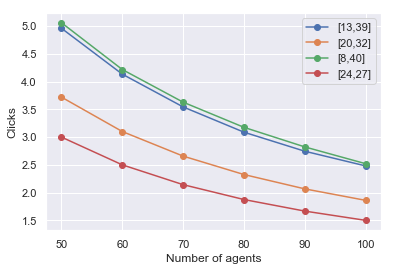

In [46]:
plt.figure()
nagents = [50, 60, 70, 80, 90, 100]
p13_39 = [4.96, 4.133333333333334, 3.5428571428571427, 3.0875, 2.7444444444444445, 2.48]
p20_32 = [3.72, 3.1, 2.657142857142857, 2.325, 2.066666666666667, 1.86]
p8_40 = [5.06, 4.216666666666667, 3.6285714285714286, 3.175, 2.8222222222222224, 2.52]
p24_27 = [3, 2.5, 2.142857142857143, 1.875, 1.6666666666666667, 1.5]



plt.plot(nagents, p13_39, '-o', label='[13,39]')
plt.plot(nagents, p20_32, '-o', label='[20,32]')
plt.plot(nagents, p8_40, '-o', label='[8,40]')
plt.plot(nagents, p24_27, '-o', label='[24,27]')
plt.xlabel('Number of agents')
plt.ylabel('Clicks')
plt.legend()
plt.show()